# Week 3 Surpervised Machine Learning Assignment

## Description of the dataset

| Column             | Description                                                                                                                                             |
|--------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------|
| `year`        | YYYY format        |
| `month` | MM format (1-12) |
| `carrier`  | Code assigned by US DOT to identify a unique airline carrier |
| `carrier name`  | Unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name or holding compnay/corporation |
| `airport`  | Three character alpha-numeric code issued by US DOT, official designation of the airport  |
| `airport name`           | Place from which aircraft operate that usually has paved runways and maintenance facilities and often serves a terminal   |
| `arr flights`  | Arrival flights  |
| `arr dell5`    | Arrival delay indicator 15 minutes or more arrival delay = difference of the actual arrival time minus the scheduled arrival time. Flight is considered on-time when it arrives less than 15 minutes after its published arrival time  |
| `carrier ct`| Carrier count for airline cause of delay  |
| `weather ct`     | Weather count for airline cause of delay |
| `nas ct` | NAS (national air system) count for airline cause of delay |
| `security ct`     | Security count for airline cause of delay |
| `Late aircraft ct`     | Late aircraft delay count for airline cause of delay |
| `arr cancelled`     | Flight cancelled |
| `arr diverted`     | Flight diverted |
| `arr delay`     | Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers |
| `carrier delay`     | Carrier Delay, in Minutes |
| `weather delay`     | Weather Delay, in minutes |
| `nas delay`     | National air system delay in minutes |
| `security delay`     | Security delay in minutes |
| `late aircraft delay`     | Late aircraft delay in minutes |
| `late`     | in time = 0 late = 1 |

## Questions
- Introoduction to dataset and project goal
- Patterns discovered
- Description of data cleaning and feature engineering process
- Explanation of model selection and evaluation results

## Introduction to datset and project goal
Dataset is from the US Department of Transportation that documents the airline on time statistics and causes of delays.

*Newly added

Goal is to create a model that predicts delayed flights based on the variables in the dataset

## Patterns discovered
Southwest airlines seems to be having a lot of recorded flights as they were both on the top of being carriers of flights in time and carriers of flights that weren't in time yet had the highest number of recorded cancellation.


[Source of data](https://www.transtats.bts.gov/ot_delay/ot_delaycause1.asp)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,  r2_score


df = pd.read_csv('Airline_Delay_Cause_2023.csv')

df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


In [2]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,171666.000000,171666.000000,171426.000000,171223.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.00000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000
mean,2018.551361,6.493633,362.528467,66.434387,20.796615,2.250347,19.381147,0.157096,23.770554,7.530497,0.863387,4239.48733,1437.185124,222.563497,920.651704,7.382725,1651.700063
std,2.890006,3.440908,992.894662,179.540694,50.315176,7.314252,61.675244,0.717405,72.393477,43.654880,3.772853,12618.56605,4215.677812,821.086511,3423.509335,41.779985,5221.878385
min,2013.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,4.000000,50.000000,6.000000,2.160000,0.000000,1.000000,0.000000,1.230000,0.000000,0.000000,335.00000,110.000000,0.000000,34.000000,0.000000,65.000000
50%,2019.000000,7.000000,100.000000,17.000000,6.400000,0.400000,3.910000,0.000000,5.000000,1.000000,0.000000,1018.00000,375.000000,18.000000,146.000000,0.000000,320.000000
75%,2021.000000,9.000000,250.000000,47.000000,17.260000,1.860000,11.710000,0.000000,15.260000,4.000000,1.000000,2884.00000,1109.000000,146.000000,477.000000,0.000000,1070.000000
max,2023.000000,12.000000,21977.000000,4176.000000,1293.910000,266.420000,1884.420000,58.690000,2069.070000,4951.000000,197.000000,438783.00000,196944.000000,31960.000000,112018.000000,3760.000000,227959.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171666 entries, 0 to 171665
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 171666 non-null  int64  
 1   month                171666 non-null  int64  
 2   carrier              171666 non-null  object 
 3   carrier_name         171666 non-null  object 
 4   airport              171666 non-null  object 
 5   airport_name         171666 non-null  object 
 6   arr_flights          171426 non-null  float64
 7   arr_del15            171223 non-null  float64
 8   carrier_ct           171426 non-null  float64
 9   weather_ct           171426 non-null  float64
 10  nas_ct               171426 non-null  float64
 11  security_ct          171426 non-null  float64
 12  late_aircraft_ct     171426 non-null  float64
 13  arr_cancelled        171426 non-null  float64
 14  arr_diverted         171426 non-null  float64
 15  arr_delay        

In [4]:
df.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            240
arr_del15              443
carrier_ct             240
weather_ct             240
nas_ct                 240
security_ct            240
late_aircraft_ct       240
arr_cancelled          240
arr_diverted           240
arr_delay              240
carrier_delay          240
weather_delay          240
nas_delay              240
security_delay         240
late_aircraft_delay    240
dtype: int64

In [4]:
#drop NA values
df = df.dropna() 

In [7]:
#convert year and month to datetime format
#df['year'] = pd.to_datetime(df['year'], format='%Y')
#df['year2'] = df['year'].dt.year
#df['year2'].unique()

In [6]:
df['year'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013],
      dtype=int64)

In [8]:
#arr_diverted by airports
airport_diversions = df.groupby('airport')['arr_diverted'].sum()
airport_diversions.sort_values(ascending=False)

airport
DFW    10271.0
DEN     7426.0
ORD     7017.0
ATL     6953.0
LGA     6004.0
        ...   
BFM        0.0
OGD        0.0
MOD        0.0
FNL        0.0
OWB        0.0
Name: arr_diverted, Length: 391, dtype: float64

In [9]:
#arr_cancelled by airports
airport_cancelled = df.groupby('airport')['arr_cancelled'].sum()
airport_cancelled.sort_values(ascending=False)

airport
ORD    80817.0
DFW    70541.0
DEN    46747.0
LGA    46546.0
ATL    45104.0
        ...   
PPG        2.0
FNL        0.0
IFP        0.0
IPT        0.0
YNG        0.0
Name: arr_cancelled, Length: 391, dtype: float64

In [10]:
#arr_diverted by carrier
carrier_diversions = df.groupby('carrier_name')['arr_diverted'].sum()
carrier_diversions.sort_values(ascending=False)

carrier_name
Southwest Airlines Co.          26147.0
American Airlines Inc.          20878.0
SkyWest Airlines Inc.           20659.0
Delta Air Lines Inc.            16556.0
United Air Lines Inc.           14037.0
ExpressJet Airlines Inc.         8252.0
JetBlue Airways                  7782.0
Envoy Air                        5295.0
Alaska Airlines Inc.             5184.0
Republic Airline                 3916.0
PSA Airlines Inc.                3513.0
Spirit Air Lines                 2748.0
Endeavor Air Inc.                2710.0
Mesa Airlines Inc.               2222.0
Frontier Airlines Inc.           1798.0
Allegiant Air                    1785.0
US Airways Inc.                  1364.0
Virgin America                    828.0
Hawaiian Airlines Inc.            682.0
American Eagle Airlines Inc.      629.0
ExpressJet Airlines LLC           422.0
Horizon Air                       330.0
AirTran Airways Corporation       251.0
Name: arr_diverted, dtype: float64

In [11]:
#arr_cancelled by carrier
carrier_canc = df.groupby('carrier_name')['arr_cancelled'].sum()
carrier_canc.sort_values(ascending=False)

carrier_name
Southwest Airlines Co.          275976.0
American Airlines Inc.          167452.0
SkyWest Airlines Inc.           138734.0
United Air Lines Inc.            86780.0
ExpressJet Airlines Inc.         85834.0
Delta Air Lines Inc.             85376.0
Envoy Air                        74187.0
JetBlue Airways                  59486.0
Republic Airline                 55324.0
PSA Airlines Inc.                43833.0
Spirit Air Lines                 34027.0
Endeavor Air Inc.                31506.0
Mesa Airlines Inc.               30339.0
Alaska Airlines Inc.             25876.0
Allegiant Air                    23307.0
Frontier Airlines Inc.           22037.0
American Eagle Airlines Inc.     15074.0
US Airways Inc.                  12167.0
ExpressJet Airlines LLC           8173.0
Hawaiian Airlines Inc.            4849.0
Horizon Air                       3608.0
Virgin America                    3156.0
AirTran Airways Corporation       1812.0
Name: arr_cancelled, dtype: float64

In [12]:
df['month'].unique()

array([ 8,  7,  6,  5,  4,  3,  2,  1, 12, 11, 10,  9], dtype=int64)

In [13]:
#airlines that arrived in time
in_time = df[df['arr_del15'] <= 15]


carrier_in_time = in_time.groupby('carrier_name')['arr_del15'].sum()
carrier_in_time.sort_values(ascending=False)

carrier_name
SkyWest Airlines Inc.           88740.0
Delta Air Lines Inc.            50394.0
Envoy Air                       48981.0
Allegiant Air                   32738.0
United Air Lines Inc.           31668.0
Alaska Airlines Inc.            31651.0
Endeavor Air Inc.               30707.0
Frontier Airlines Inc.          29153.0
ExpressJet Airlines Inc.        28288.0
Mesa Airlines Inc.              23609.0
American Airlines Inc.          21672.0
PSA Airlines Inc.               21322.0
JetBlue Airways                 17194.0
Republic Airline                16218.0
Spirit Air Lines                 9731.0
Southwest Airlines Co.           7870.0
Hawaiian Airlines Inc.           7807.0
ExpressJet Airlines LLC          4990.0
US Airways Inc.                  4635.0
Horizon Air                      4539.0
Virgin America                   3155.0
American Eagle Airlines Inc.     3052.0
AirTran Airways Corporation      2087.0
Name: arr_del15, dtype: float64

In [14]:
#airports that have high instances of late arrival

is_late = df[df['arr_del15'] > 15]

airport_delay = is_late.groupby('airport')['arr_del15'].sum()
airport_delay.sort_values(ascending=False)

airport
ORD    535022.0
ATL    506441.0
DFW    479075.0
DEN    431915.0
LAX    396487.0
         ...   
IAG        18.0
CYS        18.0
INL        16.0
LBL        16.0
LWS        16.0
Name: arr_del15, Length: 367, dtype: float64

In [15]:
#airports with recorded in time values
airport_delay = in_time.groupby('airport')['arr_del15'].sum()
airport_delay.sort_values(ascending=False)

airport
DSM    4835.0
ALB    4705.0
SYR    4399.0
MDT    4278.0
RIC    4061.0
        ...  
IYK       7.0
FOE       6.0
CLD       3.0
YNG       2.0
FNL       0.0
Name: arr_del15, Length: 389, dtype: float64

In [16]:
#airlines that have instances of late arrivals
airline_delayed = is_late.groupby('carrier_name')['arr_del15'].sum()
airline_delayed.sort_values(ascending=False)

carrier_name
Southwest Airlines Co.          2452693.0
American Airlines Inc.          1516589.0
Delta Air Lines Inc.            1148490.0
SkyWest Airlines Inc.           1079070.0
United Air Lines Inc.            999073.0
JetBlue Airways                  630725.0
ExpressJet Airlines Inc.         512290.0
Envoy Air                        345644.0
Spirit Air Lines                 320977.0
Alaska Airlines Inc.             286079.0
Frontier Airlines Inc.           262250.0
Republic Airline                 253818.0
PSA Airlines Inc.                210326.0
Endeavor Air Inc.                169852.0
Mesa Airlines Inc.               146451.0
US Airways Inc.                  129881.0
Allegiant Air                    117205.0
Hawaiian Airlines Inc.            81987.0
Virgin America                    61450.0
American Eagle Airlines Inc.      58080.0
ExpressJet Airlines LLC           24682.0
Horizon Air                       24143.0
AirTran Airways Corporation       23139.0
Name: arr_del15, dtyp

In [5]:
#creating a boolean column determining if the airline was late or not ()
df['late'] = df['arr_del15'] > 15

df['late']

0         False
1         False
2         False
3         False
4          True
          ...  
171661    False
171662    False
171663    False
171664    False
171665    False
Name: late, Length: 171223, dtype: bool

In [6]:
#in time = 0 late = 1
df['late'] = df['late'].astype(int)
df['late']

0         0
1         0
2         0
3         0
4         1
         ..
171661    0
171662    0
171663    0
171664    0
171665    0
Name: late, Length: 171223, dtype: int32

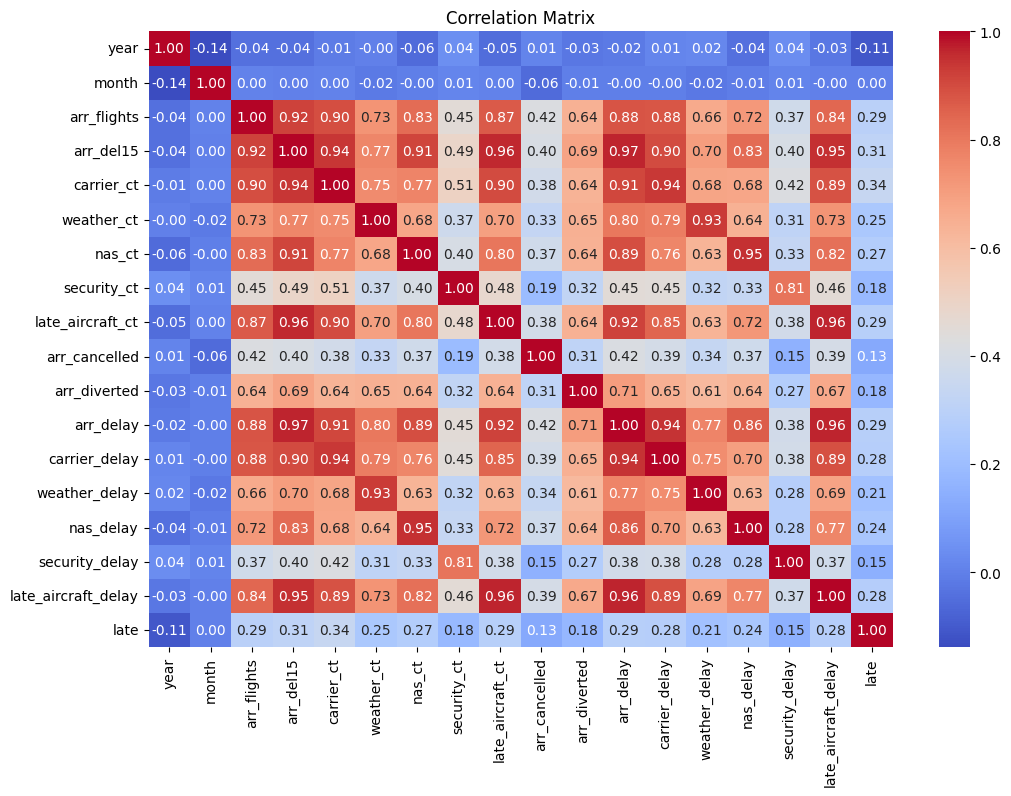

In [19]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=np.number)

# Create a correlation matrix using seaborn's heatmap
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
late_aircraft_delay

arr_flights
weather_ct
security_ct
arr_diverted
weather_delay

arr_flights
arr_del15
carrier_ct
weather_ct
nas_ct
security_ct
late_aircraft_ct
arr_cancelled
arr_diverted
carrier_delay


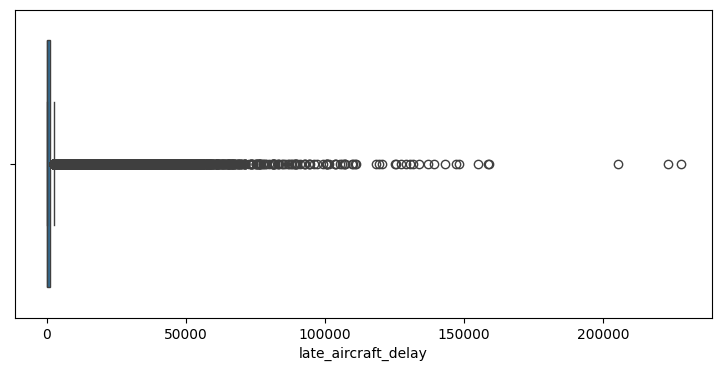

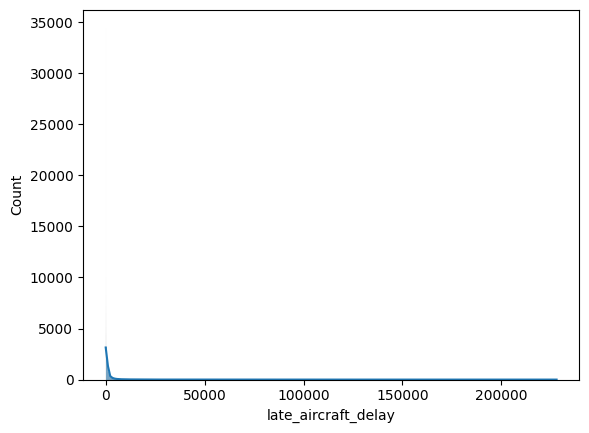

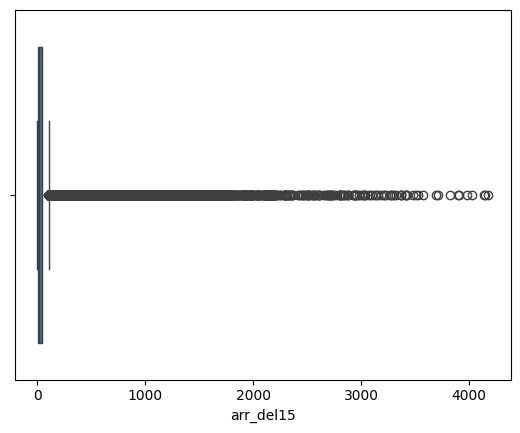

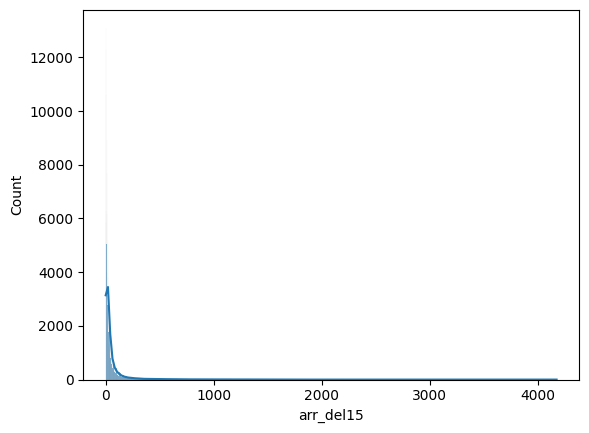

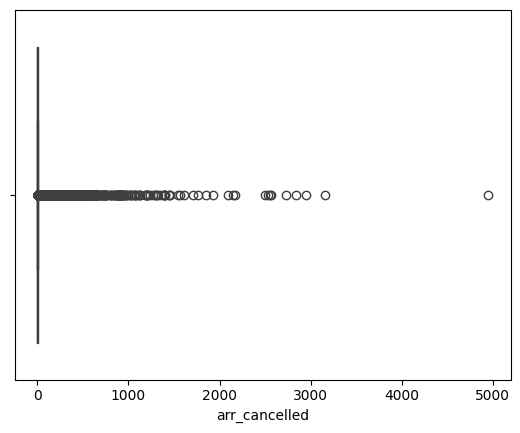

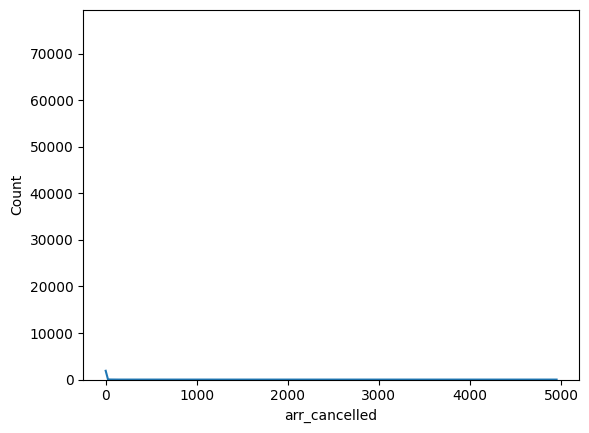

In [20]:
#box plot for late_aircraft_delay, arr_del15, arr_cancelled, 
# Create a figure with two subplots
plt.figure(figsize=(9, 4))

sns.boxplot(x='late_aircraft_delay', data=df)
plt.show()
sns.histplot(x='late_aircraft_delay',kde=True, data=df)
plt.show()

sns.boxplot(x='arr_del15', data=df)
plt.show()
sns.histplot(x='arr_del15',kde=True, data=df)
plt.show()

sns.boxplot(x='arr_cancelled', data=df)
plt.show()
sns.histplot(x='arr_cancelled',kde=True, data=df)
plt.show()



In [7]:
# 25% of the data is above the value of Q1_total
Q1_total = df['arr_cancelled'].quantile(0.25)

# 75% of the data is below the value of Q1_total
Q3_total = df['arr_cancelled'].quantile(0.75)

# calculate the outliers
IQR_total = Q3_total - Q1_total
# this is data 1.5 times below most data, retrieve these rows
# (in this case there are none)
outliers_low = df[(df['arr_cancelled'] < Q1_total - 1.5 * IQR_total)]

# this is data 1.5 times above most data, retrieve these rows
outliers_high = df[(df['arr_cancelled'] > Q3_total + 1.5 * IQR_total)]
outliers_high.sort_values(by='arr_cancelled', ascending=False).head(10)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,late
66524,2020,3,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",20669.0,1139.0,421.41,15.75,...,302.27,4951.0,8.0,81479.0,49330.0,2127.0,13887.0,0.0,16135.0,1
65491,2020,4,OH,PSA Airlines Inc.,CLT,"Charlotte, NC: Charlotte Douglas International",6621.0,155.0,101.78,5.90,...,31.23,3154.0,2.0,15315.0,10814.0,699.0,495.0,24.0,3283.0,1
64626,2020,4,AA,American Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",7237.0,300.0,135.02,9.37,...,52.01,2945.0,1.0,21822.0,14079.0,559.0,2891.0,0.0,4293.0,1
65914,2020,4,WN,Southwest Airlines Co.,DEN,"Denver, CO: Denver International",5322.0,94.0,35.21,1.88,...,9.54,2839.0,1.0,3425.0,1798.0,115.0,1167.0,21.0,324.0,1
65933,2020,4,WN,Southwest Airlines Co.,LAS,"Las Vegas, NV: McCarran International",4882.0,57.0,16.99,2.19,...,6.33,2730.0,1.0,1810.0,694.0,66.0,807.0,0.0,243.0,1
65905,2020,4,WN,Southwest Airlines Co.,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",5017.0,44.0,27.01,0.00,...,8.56,2565.0,0.0,1757.0,1124.0,0.0,292.0,0.0,341.0,1
65912,2020,4,WN,Southwest Airlines Co.,DAL,"Dallas, TX: Dallas Love Field",4737.0,82.0,27.67,1.97,...,9.96,2551.0,6.0,2776.0,1191.0,190.0,933.0,0.0,462.0,1
66296,2020,3,AA,American Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",12768.0,1493.0,326.60,31.85,...,497.82,2527.0,40.0,106834.0,39253.0,2873.0,27999.0,31.0,36678.0,1
65943,2020,4,WN,Southwest Airlines Co.,MDW,"Chicago, IL: Chicago Midway International",5314.0,55.0,26.21,0.60,...,10.18,2503.0,1.0,2054.0,982.0,9.0,647.0,19.0,397.0,1
65958,2020,4,WN,Southwest Airlines Co.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",4377.0,104.0,36.86,0.87,...,8.83,2166.0,6.0,3567.0,1700.0,20.0,1518.0,26.0,303.0,1


In [8]:
#above 300 seems to be extreme outliers so remove them
df_clean = df[df['arr_del15']<500]

print(f"Number of rows in df: {df.shape[0]}, and after filtering {df_clean.shape[0]}")

Number of rows in df: 171223, and after filtering 166454


As there are outliers in arr_del15 above 300, they were removed

In [9]:
# Convert the yes/no columns to 1/0 using LabelEncoder
label_encoder = LabelEncoder()
y=label_encoder.fit_transform(df_clean['late'])

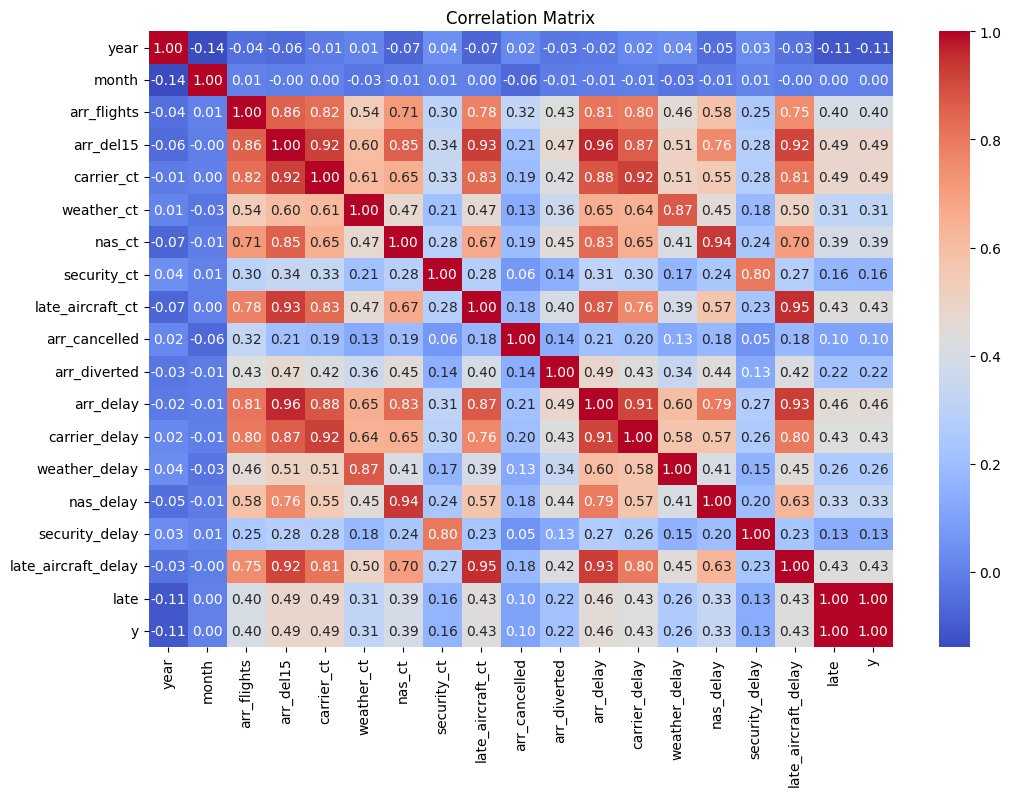

In [10]:
# Select only numeric columns
numeric_columns = df_clean.select_dtypes(include=np.number)
numeric_columns['y']=y
# Create a correlation matrix using seaborn's heatmap
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [11]:
df_clean['carrier_name'].unique()

array(['Endeavor Air Inc.', 'American Airlines Inc.',
       'Alaska Airlines Inc.', 'JetBlue Airways', 'Delta Air Lines Inc.',
       'Frontier Airlines Inc.', 'Allegiant Air',
       'Hawaiian Airlines Inc.', 'Envoy Air', 'Spirit Air Lines',
       'PSA Airlines Inc.', 'SkyWest Airlines Inc.',
       'United Air Lines Inc.', 'Southwest Airlines Co.',
       'Republic Airline', 'Horizon Air', 'Mesa Airlines Inc.',
       'ExpressJet Airlines LLC', 'ExpressJet Airlines Inc.',
       'Virgin America', 'US Airways Inc.', 'AirTran Airways Corporation',
       'American Eagle Airlines Inc.'], dtype=object)

In [35]:
#Only keep numerical values without including the values with ct or counts
df_clean_new = df_clean[['arr_flights','arr_del15','arr_cancelled', 'arr_diverted','arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay','late']]

In [36]:
df_clean_new['late'].value_counts()

late
1    86090
0    80364
Name: count, dtype: int64

## Building the model

In [37]:
X = df_clean_new.loc[:, ~df_clean_new.columns.isin(['late'])] 
y = df_clean_new['late'] 

X = normalize(X)

In [38]:
#split data into test and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9
0,0.048684,0.010954,0.000406,0.000406,0.812212,0.085603,0.000000,0.180942,0.0,0.545667
1,0.095342,0.019818,0.003749,0.000536,0.804512,0.558659,0.144619,0.000000,0.0,0.101234
2,0.050829,0.013117,0.007105,0.000000,0.825288,0.152487,0.003826,0.148661,0.0,0.520314
3,0.077026,0.021621,0.000000,0.000000,0.855397,0.343240,0.000000,0.336483,0.0,0.175674
4,0.100836,0.022088,0.000960,0.000000,0.856623,0.360128,0.000000,0.212235,0.0,0.284261


In [39]:
knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #train the model

## Model evaluation
Calculating accuracy using the test data

In [40]:
knn.score(X_test, y_test) 

0.7661653683641388

Accuracy is **77%**. Comparing it with the best baseline guess: always guess "late". That would give us 86090 / (86090 + 80364) = **51.7%** (see *value_counts* above). So the model is a lot better than the baseline guess.

In [41]:
y_test_pred = knn.predict(X_test) 
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[17418,  6630],
       [ 5047, 20842]], dtype=int64)

In [42]:
conf_matrix = pd.DataFrame(cm, index=['Late (actual)', 'Not late (actual)'], columns = ['Late (predicted)', 'late (predicted)']) 
conf_matrix

,Late (predicted),late (predicted)
Late (actual),17418,6630
Not late (actual),5047,20842


|                             | Late (predicted)	                          | Not late (predicted)                        |
|-----------------------------|---------------------------------------------------|-------------------------------------------------|
| **Late (actual)**       | True Positives                                    | False Negatives                                 |
| **Not late (actual)**	  | False Positives                                   | True Negatives                                  |

Calculating precision and recall for *late*

<b>Correctly predicted late flights<b>c divided by <b>ctotal number of predicted late flights<b>c

In [35]:
17418/(5047+17418)

0.7753394168706877

Precision is 78%, so not bad

Calculate recall
Number of <b>correctly predicted late flights</b>, divided by the <b>total number of actual late flights

In [36]:
#calculate recall
17418/(6630+17418)

0.7243013972055888

Precision is 72%, so ehh.. not bad

In [44]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75     24048
           1       0.76      0.81      0.78     25889

    accuracy                           0.77     49937
   macro avg       0.77      0.76      0.77     49937
weighted avg       0.77      0.77      0.77     49937



## Parameter Setting

In [36]:
from sklearn.metrics import classification_report

for i in range(1,11):
    knn_new = KNeighborsClassifier(n_neighbors = i) #make a new kNN model with i (1-10) neighbors
    knn_new = knn_new.fit(X_train, y_train) #fit new model on train data
    y_test_pred_new = knn_new.predict(X_test) #predict using new model, with test data
    print(f"With {i} neighbors the result is:")
    print(classification_report(y_test, y_test_pred_new)) #use a built-in function to print out accuracy, precision and recall


With 1 neighbors the result is:
              precision    recall  f1-score   support

           0       0.72      0.71      0.71     24048
           1       0.73      0.74      0.74     25889

    accuracy                           0.73     49937
   macro avg       0.73      0.73      0.73     49937
weighted avg       0.73      0.73      0.73     49937

With 2 neighbors the result is:
              precision    recall  f1-score   support

           0       0.65      0.83      0.73     24048
           1       0.79      0.59      0.67     25889

    accuracy                           0.71     49937
   macro avg       0.72      0.71      0.70     49937
weighted avg       0.72      0.71      0.70     49937

With 3 neighbors the result is:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74     24048
           1       0.75      0.79      0.77     25889

    accuracy                           0.76     49937
   macro avg       0.76      0.7

3 neighbors had the best accuracy result of 77% and model predicted delayed flights by 75% while of the dleays that took place model only predicted the outcome correctly for 79%.
It's pretty close to 80% so model is doing an ok job at predicting delayed airline/flights. 

## *Newly added from here

In [ ]:
#preparing gridsearchcv
from sklearn.model_selection import GridSearchCV

k_range = list(range(1, 31))
print(k_range)

param_grid = dict(n_neighbors=k_range)
print(param_grid)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X, y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [40]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.72332311 0.70477164 0.75205182 0.74287828 0.76314197 0.75772922
 0.76856091 0.76520878 0.77218355 0.76961838 0.77415409 0.77169103
 0.77527751 0.77377567 0.77602247 0.77514542 0.7774643  0.77657524
 0.77818525 0.77742833 0.77884008 0.77851572 0.77906836 0.77886416
 0.77926062 0.77925466 0.77952497 0.77989148 0.78023988 0.78035405]


Text(0, 0.5, 'Cross-Validated Accuracy')

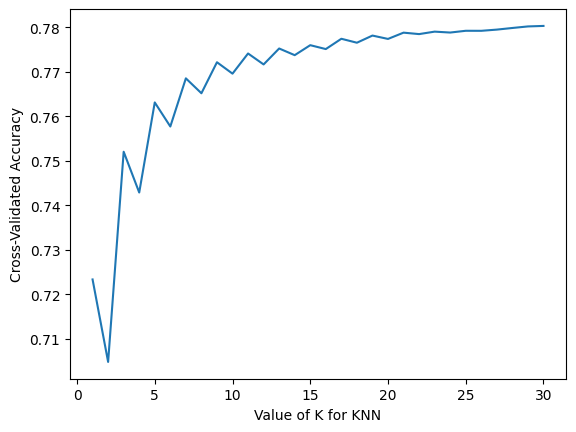

In [41]:
#plot the grid scores
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [42]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7803540504373816
{'n_neighbors': 30}
KNeighborsClassifier(n_neighbors=30)


In [45]:
from sklearn.model_selection import GridSearchCV

k_range = list(range(1, 31))
print(k_range)

param_grid = dict(n_neighbors=k_range)
print(param_grid)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X_train, y_train)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [46]:
print(grid.best_score_)
print(grid.best_params_)

0.7848124764451236
{'n_neighbors': 29}


GridSearchCV revealed that the best n_neighbors for the model of predicting delayed flights are 29 with accuracy of close to 78%.

In [47]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'late': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best average Accuracy: {grid_search.best_score_:.2f}")

NameError: name 'model' is not defined

## Creating a linear regression model

Including categorical values that might affect delayed flights

In [68]:
f_dummies = pd.get_dummies(df_clean,columns=['carrier_name', 'airport'],drop_first= True)
f_dummies.head()

,year,month,carrier,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,...,airport_VLD,airport_VPS,airport_WRG,airport_WYS,airport_XNA,airport_XWA,airport_YAK,airport_YKM,airport_YNG,airport_YUM
0,2023,8,9E,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,3.16,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2023,8,9E,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,0.57,0.0,...,False,False,False,False,False,False,False,False,False,False
2,2023,8,9E,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,1.80,0.0,...,False,False,False,False,False,False,False,False,False,False
3,2023,8,9E,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,4.47,0.0,...,False,False,False,False,False,False,False,False,False,False
4,2023,8,9E,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,2.96,0.0,...,False,False,False,False,False,False,False,False,False,False


In [69]:
#trying to create a model with least amount of variables and dropping columns that had a high correlation
f_dummies=f_dummies.drop(columns=['airport_name','carrier', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'carrier_delay'])
f_dummies.head()

,year,month,arr_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,late,carrier_name_Alaska Airlines Inc.,carrier_name_Allegiant Air,...,airport_VLD,airport_VPS,airport_WRG,airport_WYS,airport_XNA,airport_XWA,airport_YAK,airport_YKM,airport_YNG,airport_YUM
0,2023,8,1375.0,761.0,118.0,0.0,425.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2023,8,799.0,1.0,62.0,0.0,518.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2023,8,766.0,188.0,78.0,0.0,444.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2023,8,1397.0,320.0,388.0,0.0,218.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2023,8,1530.0,0.0,134.0,0.0,768.0,1,False,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
#convert float columns into int
m = f_dummies.select_dtypes(np.number)
f_dummies[m.columns]= m.round().astype('Int64')

In [71]:
y = f_dummies['late_aircraft_delay']
X = f_dummies.loc[:, ~f_dummies.columns.isin(['late_aircraft_delay'])]
X.head()

,year,month,arr_delay,weather_delay,nas_delay,security_delay,late,carrier_name_Alaska Airlines Inc.,carrier_name_Allegiant Air,carrier_name_American Airlines Inc.,...,airport_VLD,airport_VPS,airport_WRG,airport_WYS,airport_XNA,airport_XWA,airport_YAK,airport_YKM,airport_YNG,airport_YUM
0,2023,8,1375,761,118,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2023,8,799,1,62,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2023,8,766,188,78,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2023,8,1397,320,388,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2023,8,1530,0,134,0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [95]:
f_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166454 entries, 0 to 171665
Columns: 420 entries, year to airport_YUM
dtypes: Int64(8), bool(412)
memory usage: 78.1 MB


In [72]:
#split data into 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 56)
X_train.head()

,year,month,arr_delay,weather_delay,nas_delay,security_delay,late,carrier_name_Alaska Airlines Inc.,carrier_name_Allegiant Air,carrier_name_American Airlines Inc.,...,airport_VLD,airport_VPS,airport_WRG,airport_WYS,airport_XNA,airport_XWA,airport_YAK,airport_YKM,airport_YNG,airport_YUM
62065,2020,6,503,197,73,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
156666,2014,8,558,85,271,8,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
78852,2019,8,4855,0,2539,0,1,True,False,False,...,False,False,False,False,False,False,False,False,False,False
161330,2014,4,381,0,87,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
161180,2014,4,3713,43,997,0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [97]:
#create model and train it
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [98]:
lm.intercept_

52661.78791816949

In [99]:
#create dataframe from coefficients and the variable labels
pd.DataFrame(X.columns, lm.coef_)

,0
-26.046403,year
-3.392413,month
0.537942,arr_delay
-0.972999,weather_delay
-0.432394,nas_delay
...,...
111.241135,airport_XWA
31.562193,airport_YAK
-23.525961,airport_YKM
0.000000,airport_YNG


In [100]:
#model evaluation
y_test_p = lm.predict(X_test)
r2_score(y_test, y_test_p)

0.9249878170045408

The score is around 92% which is most likely due to the dataset itself already containing rows regarding delayed flights and it being a famous high quality dataset

In [101]:
#calculate RMSE
np.sqrt(mean_squared_error(y_test, y_test_p))

522.7001257797272

In [102]:
# Making a copy to prevent overwrites
f_test = X_test.copy()

# Add actual 'delay' values (from y_test) and predicted prices ('price_p')
f_test['delay'] = y_test.values  # Use .values to align correctly
f_test['delay_p'] = lm.predict(X_test)

# Display the first few rows of the modified dataframe
f_test.head()

,year,month,arr_delay,weather_delay,nas_delay,security_delay,late,carrier_name_Alaska Airlines Inc.,carrier_name_Allegiant Air,carrier_name_American Airlines Inc.,...,airport_WRG,airport_WYS,airport_XNA,airport_XWA,airport_YAK,airport_YKM,airport_YNG,airport_YUM,delay,delay_p
17508,2022,9,22266,847,4467,0,1,False,False,True,...,False,False,False,False,False,False,False,False,8702,9115.356469
65315,2020,4,0,0,0,0,0,False,False,False,...,False,False,False,False,False,False,False,False,0,86.194529
88063,2019,3,454,0,44,0,0,False,True,False,...,False,False,False,False,False,False,False,False,138,253.133543
15593,2022,11,15186,864,4222,0,1,False,False,False,...,False,False,False,False,False,False,False,False,4089,5128.977039
133463,2016,4,688,25,125,0,0,False,False,True,...,False,False,False,False,False,False,False,False,500,369.088241


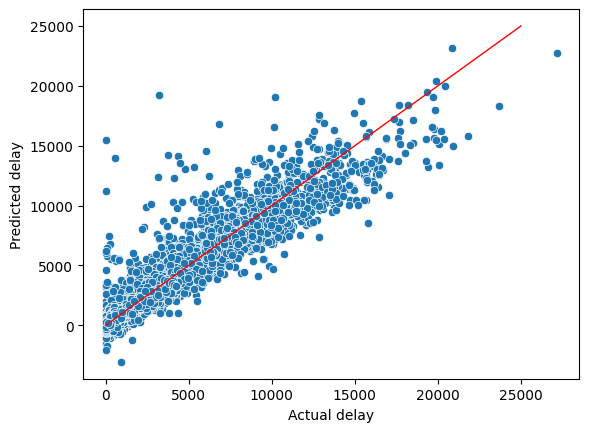

In [105]:
#plotting the predictions
sns.scatterplot(x=y_test, y=y_test_p)
plt.xlabel('Actual delay')
plt.ylabel('Predicted delay')
plt.plot([0,25000], [0, 25000], color='red', lw=1) #plot a diagonal length
plt.show()

The model appears essentially linear which won't happen normally but as the dataset only showed data regarding delay it's bound to be this way. Had the dataset been a regular flight dataset with some columns for measuring delays instead of all columns targeted towards delays the regression model would have looked completely different and not as perfectly linear. Also for predicting delays classification models are more suitable as it is classifying whether a flight will be late or not.

## Decision Tree Model

In [19]:
#selecting variables for the decision tree
df_clean_new2 = df_clean[['carrier_name', 'airport','late_aircraft_delay','late']]

In [20]:
# Encode categorical variables
df_encoded = df_clean_new2
categorical_columns = ['carrier_name', 'airport']
for col in categorical_columns:
    label_encoder = LabelEncoder()
    df_encoded.loc[:, col] = label_encoder.fit_transform(df_encoded[col])

df_encoded.head()

,carrier_name,airport,late_aircraft_delay,late
0,6,0,425.0,0
1,6,4,518.0,0
2,6,11,444.0,0
3,6,12,218.0,0
4,6,14,768.0,1


In [21]:
# Defining feature and target
X = df_encoded.drop(columns=['late'])
y = df_encoded['late']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Train a Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42, max_depth=3)
tree_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_tree = tree_clf.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.8647095340128562
              precision    recall  f1-score   support

           0       0.83      0.91      0.87     24022
           1       0.91      0.83      0.86     25915

    accuracy                           0.86     49937
   macro avg       0.87      0.87      0.86     49937
weighted avg       0.87      0.86      0.86     49937



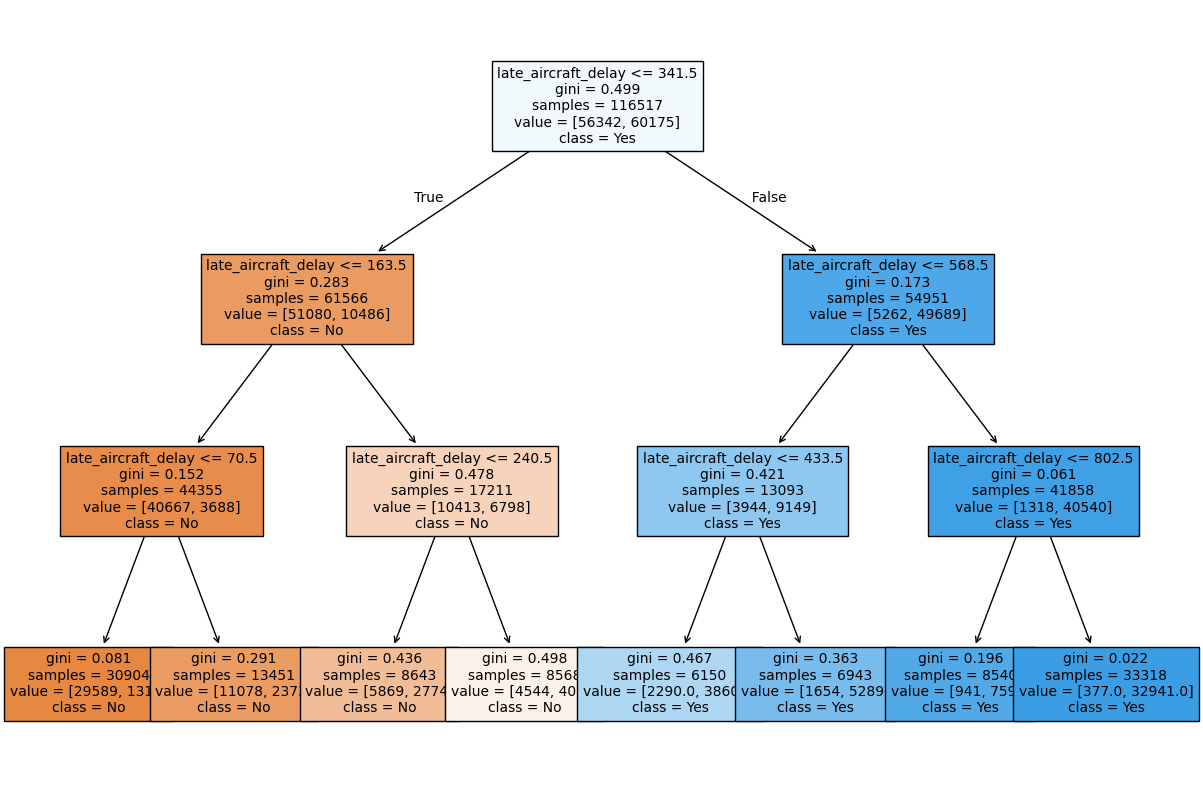

In [ ]:
# Visualizing the tree
plt.figure(figsize=(15, 10))
plot_tree(tree_clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, fontsize=10)
plt.show()

Left is <= late aircraft min 341.5 True
Right is >= late aircraft min 341.5 False

Gini index shows that the model was able to predict Not delayed flights with a higher confidence.


In [24]:
from sklearn.model_selection import GridSearchCV

# Decision Tree Hyperparameter Tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search_tree.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters for Decision Tree:", grid_search_tree.best_params_)
print("Best Cross-Validated Accuracy:", grid_search_tree.best_score_)

# Evaluate on the test set
best_tree = grid_search_tree.best_estimator_
y_pred_best_tree = best_tree.predict(X_test)
print("Test Accuracy of Tuned Decision Tree:", accuracy_score(y_test, y_pred_best_tree))


Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Cross-Validated Accuracy: 0.8737008333547894
Test Accuracy of Tuned Decision Tree: 0.8755632096441517


## Keras

In [29]:
df_dummies = pd.get_dummies(df_clean_new2,columns=['carrier_name', 'airport','late_aircraft_delay','late'],drop_first= True)
df_dummies.head()

,carrier_name_1,carrier_name_2,carrier_name_3,carrier_name_4,carrier_name_5,carrier_name_6,carrier_name_7,carrier_name_8,carrier_name_9,carrier_name_10,...,late_aircraft_delay_24462.0,late_aircraft_delay_24618.0,late_aircraft_delay_24674.0,late_aircraft_delay_24742.0,late_aircraft_delay_25041.0,late_aircraft_delay_25528.0,late_aircraft_delay_26638.0,late_aircraft_delay_27144.0,late_aircraft_delay_27555.0,late_1
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [32]:
from sklearn.preprocessing import normalize

# Define features target
X = df_dummies.drop(columns=['late_1'])
y = df_dummies['late_1']

X = normalize(X)

# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Import libraries for Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build a simple Neural Network
nn_model = Sequential([
    Dense(16, activation='relu', input_dim=X_train.shape[1]),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2913/2913 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7431 - loss: 0.5040 - val_accuracy: 0.8606 - val_loss: 0.3391
Epoch 2/10
2913/2913 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8656 - loss: 0.3185 - val_accuracy: 0.8721 - val_loss: 0.3082
Epoch 3/10
2913/2913 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8812 - loss: 0.2828 - val_accuracy: 0.8722 - val_loss: 0.2981
Epoch 4/10
2913/2913 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8900 - loss: 0.2565 - val_accuracy: 0.8739 - val_loss: 0.2937
Epoch 5/10
2913/2913 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8952 - loss: 0.2418 - val_accuracy: 0.8750 - val_loss: 0.2959
Epoch 6/10
2913/2913 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9014 - loss: 0.2272 - val_accuracy: 0.8720 - val_loss: 0.2994
Epoch 7/10
2913/2913 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9037 - loss: 0.2205 - val_accuracy: 0.8704 - val_loss: 0.3059
Epoch 8/10
2913/2913 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9076 - loss: 0.2106 - 

1561/1561 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step - accuracy: 0.8662 - loss: 0.3271
Neural Network Accuracy: 0.8664517402648926


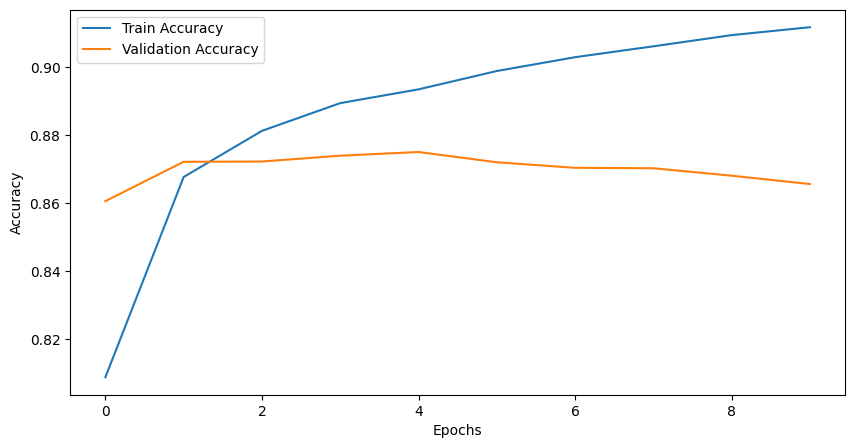

In [34]:
# Evaluate the model
loss, accuracy = nn_model.evaluate(X_test, y_test)
print("Neural Network Accuracy:", accuracy)

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The results was a rather high accuracy rate being around 0.91 percent on the 10th epoch for the training set while validation accuracy was above 86% throughout all epochs.
Naturally I can assume that this was due to the high quality dataset as the dataset itself is a well known dataset.


## Reflection

Finding the right dataset with the right numerical values was most difficult that was related to my client project. When I found the dataset I used for this assignment determining the feature to create the model from was also challenging. In this case I created a value of whether the airline was late or not by creating a separate column value to base the model off of. In addition to that determining which model to use for the supervised machine learning was challenging as well. I will need to study further in the variations so that I can determine which model is most suitable for the data that I have. As in this dataset the case of whether the airline is delayed or not was a binary 0/1 situation I proceeded with the classification model and for public transportation data that has delay data classification model might be more of relevant than a regression model.

## *Newly added - Model Comparison
After doing the Decision Tree model and the Keras model with less values, the accuracy was higher than of knn neighbhors by almost 10 percent. Overall the accuracy was all above 77 percent which was decent but decision tree model and the keras model brought out a higher accuracy level in predicting delayed flights. 